<a href="https://colab.research.google.com/github/nirmalghimire/DDP_Achievement-Gap/blob/main/Metacognition_OECD_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metacognitiver Reading Strategies of 15-Year-Old Students in OECD Countries

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
!pip install pyreadstat #Required to load SPSS (.sav) data
import pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.2 MB/s eta 0:00:00


In [ ]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the Full Data
I will also try to keep the meta-data. The `Pyreadstat` allows us to do so.

In [ ]:
# Load the SAV file into a pandas DataFrame
file_path = '/content/drive/MyDrive/Colab Notebooks/CY07_MSU_STU_QQQ_1.sav'
full_data, metadata = pyreadstat.read_sav(file_path)
print(full_data.head())
print(full_data.dtypes)

   CNTRYID  CNT  CNTSCHID  CNTSTUID  OECD  ST001D01T  ST004D01T  ST153Q01HA  \
0      8.0  ALB  800002.0  800251.0   0.0       10.0        2.0         1.0   
1      8.0  ALB  800002.0  800402.0   0.0       10.0        2.0         1.0   
2      8.0  ALB  800002.0  801902.0   0.0       10.0        1.0         1.0   
3      8.0  ALB  800002.0  803546.0   0.0       10.0        2.0         1.0   
4      8.0  ALB  800002.0  804776.0   0.0       10.0        2.0         1.0   

   ST153Q02HA  ST153Q03HA  ...  PV2READ  PV3READ  PV4READ  PV5READ  PV6READ  \
0         1.0         1.0  ...  366.610  388.501  373.728  354.077  370.415   
1         1.0         1.0  ...  425.045  448.285  433.872  447.108  432.037   
2         1.0         1.0  ...  320.458  346.658  329.878  349.492  328.967   
3         1.0         1.0  ...  417.751  385.422  415.475  376.414  445.205   
4         1.0         1.0  ...  331.580  361.722  364.681  358.006  318.300   

   PV7READ  PV8READ  PV9READ  PV10READ  test  
0  

In [ ]:
# Subsetting the Data
# Create a list of columns to keep
columns_to_keep = [col for col in full_data.columns if col not in full_data.columns[0:4] and col not in full_data.columns[63:76]]

# Create the subset DataFrame
trunc_data = full_data[columns_to_keep]

# Now 'data' contains the subset of your original data
print(trunc_data.dtypes)
print(trunc_data.head())

In [ ]:
# For OECD-affiliated countries
oecd_data = trunc_data[trunc_data['OECD'] == 1.0]
oecd_data.shape

(294527, 59)

In [ ]:
# For partner countries
partner_data = trunc_data[trunc_data['OECD'] == 0.0]
partner_data.shape

(317477, 59)

## Let's Focus on OECD Data

In [ ]:
# Summary of the Variables
print(oecd_data.describe())

           OECD      ST001D01T      ST004D01T     ST153Q01HA     ST153Q02HA  \
count  294527.0  294527.000000  294525.000000  276617.000000  275921.000000   
mean        1.0      12.075053       1.501998       1.308340       1.293196   
std         0.0      14.231363       0.499997       0.461809       0.455228   
min         1.0       7.000000       1.000000       1.000000       1.000000   
25%         1.0       9.000000       1.000000       1.000000       1.000000   
50%         1.0      10.000000       2.000000       1.000000       1.000000   
75%         1.0      10.000000       2.000000       2.000000       2.000000   
max         1.0      98.000000       2.000000       2.000000       2.000000   

          ST153Q03HA     ST153Q04HA     ST153Q05HA     ST153Q06HA  \
count  275605.000000  275742.000000  275767.000000  275196.000000   
mean        1.504109       1.250571       1.175083       1.612124   
std         0.499984       0.433343       0.380038       0.487267   
min         

In [ ]:
# Impute data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputed_data = imputer.fit_transform(oecd_data)
data = pd.DataFrame(imputed_data, columns=oecd_data.columns)
print(data.describe())

           OECD      ST001D01T      ST004D01T     ST153Q01HA     ST153Q02HA  \
count  294527.0  294527.000000  294527.000000  294527.000000  294527.000000   
mean        1.0      12.075053       1.501998       1.308340       1.293196   
std         0.0      14.231363       0.499995       0.447547       0.440615   
min         1.0       7.000000       1.000000       1.000000       1.000000   
25%         1.0       9.000000       1.000000       1.000000       1.000000   
50%         1.0      10.000000       2.000000       1.000000       1.000000   
75%         1.0      10.000000       2.000000       2.000000       2.000000   
max         1.0      98.000000       2.000000       2.000000       2.000000   

          ST153Q03HA     ST153Q04HA     ST153Q05HA     ST153Q06HA  \
count  294527.000000  294527.000000  294527.000000  294527.000000   
mean        1.504109       1.250571       1.175083       1.612124   
std         0.483657       0.419296       0.367736       0.471005   
min         

In [ ]:
# Separate the features (X) and the target variable (y)
X = data.drop(columns=['UNDREM', 'METASUM', 'METASPAM'])
y_undrem = data['UNDREM']
y_metasum = data['METASUM']
y_metaspam = data['METASPAM']

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_undrem_train, y_undrem_test, y_metasum_train, y_metasum_test, y_metaspam_train, y_metaspam_test = train_test_split(
    X, y_undrem, y_metasum, y_metaspam, test_size=0.3, random_state=42)

## Training the OECD Primary Models
### a. Primary Model Understanding and Memorizing for OECD Countries

In [ ]:
# Create and train the random forest models
# A. Meta-cognition of Reading: Understanding and Remembering
model_undrem = RandomForestRegressor(n_estimators=100)
model_undrem.fit(X_train, y_undrem_train)

RandomForestRegressor()

### b. Primary Model for Summarizing Texts

In [ ]:
# B. Meta-cognition of Reading: Summarizing
model_metasum = RandomForestRegressor(n_estimators=100)
model_metasum.fit(X_train, y_metasum_train)

RandomForestRegressor()

### c. Assessing Quality

In [ ]:
# C. Meta-cognition of Reading: Assessing Credibility
model_metaspam = RandomForestRegressor(n_estimators=100)
model_metaspam.fit(X_train, y_metaspam_train)

RandomForestRegressor()

## Validating the Findings with the Test Data

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Make predictions on the test data
undrem_predictions = model_undrem.predict(X_test)
metasum_predictions = model_metasum.predict(X_test)
metaspam_predictions = model_metaspam.predict(X_test)

### Calculating Test Statiscis for all Models in Training and Test Data for OECD Countries

In [ ]:
# Calculate and print performance metrics for training data
def print_metrics(model, X, y, dataset_type):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)

    print(f"{dataset_type} - Mean Squared Error for OECD Countries: {mse}")
    print(f"{dataset_type} - Mean Absolute Error for OECD Countries: {mae}")
    print(f"{dataset_type} - R-squared Score for OECD Countries: {r2}")

# For UNDREM model
print("UNDREM Model:")
print_metrics(model_undrem, X_train, y_undrem_train, "Training")
print_metrics(model_undrem, X_test, y_undrem_test, "Test")

# For METASUM model
print("\nMETASUM Model:")
print_metrics(model_metasum, X_train, y_metasum_train, "Training")
print_metrics(model_metasum, X_test, y_metasum_test, "Test")

# For METASPAM model
print("\nMETASPAM Model:")
print_metrics(model_metaspam, X_train, y_metaspam_train, "Training")
print_metrics(model_metaspam, X_test, y_metaspam_test, "Test")

UNDREM Model:
Training - Mean Squared Error for OECD Countries: 0.0011852519580229561
Training - Mean Absolute Error for OECD Countries: 0.010516084059504917
Training - R-squared Score for OECD Countries: 0.9986638055831432
Test - Mean Squared Error for OECD Countries: 0.008174175894635668
Test - Mean Absolute Error for OECD Countries: 0.027941568848903364
Test - R-squared Score for OECD Countries: 0.9908505252456739

METASUM Model:
Training - Mean Squared Error for OECD Countries: 0.00048615765424119147
Training - Mean Absolute Error for OECD Countries: 0.004071690004208097
Training - R-squared Score for OECD Countries: 0.9994489359195725
Test - Mean Squared Error for OECD Countries: 0.003570902262434302
Test - Mean Absolute Error for OECD Countries: 0.010931668729171172
Test - R-squared Score for OECD Countries: 0.995946657941601

METASPAM Model:
Training - Mean Squared Error for OECD Countries: 0.0004188101842289502
Training - Mean Absolute Error for OECD Countries: 0.00341060222241

## Plotting the OECD Primary Models

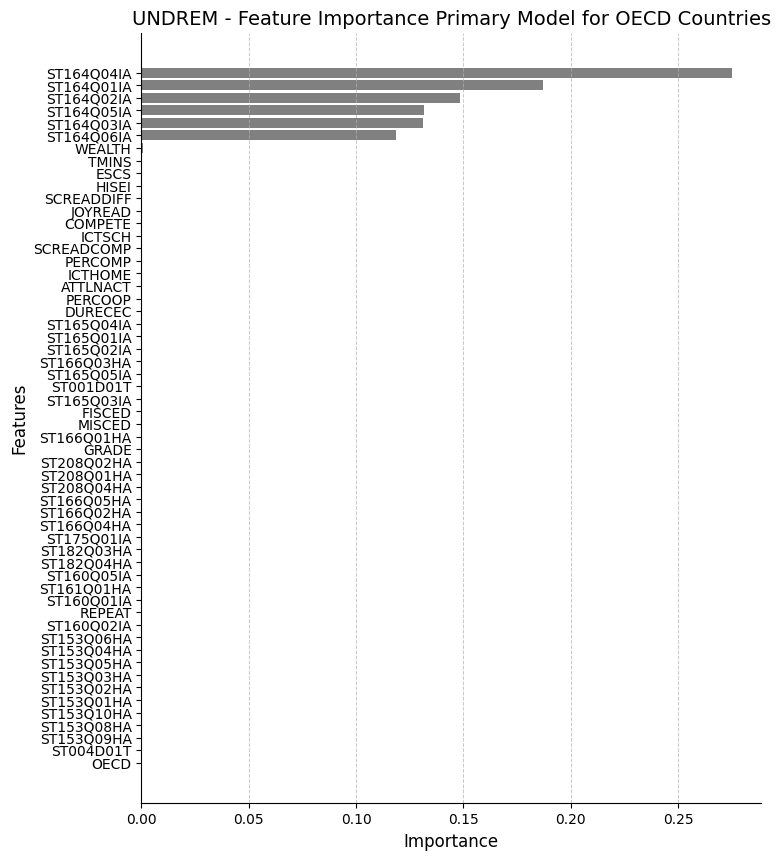

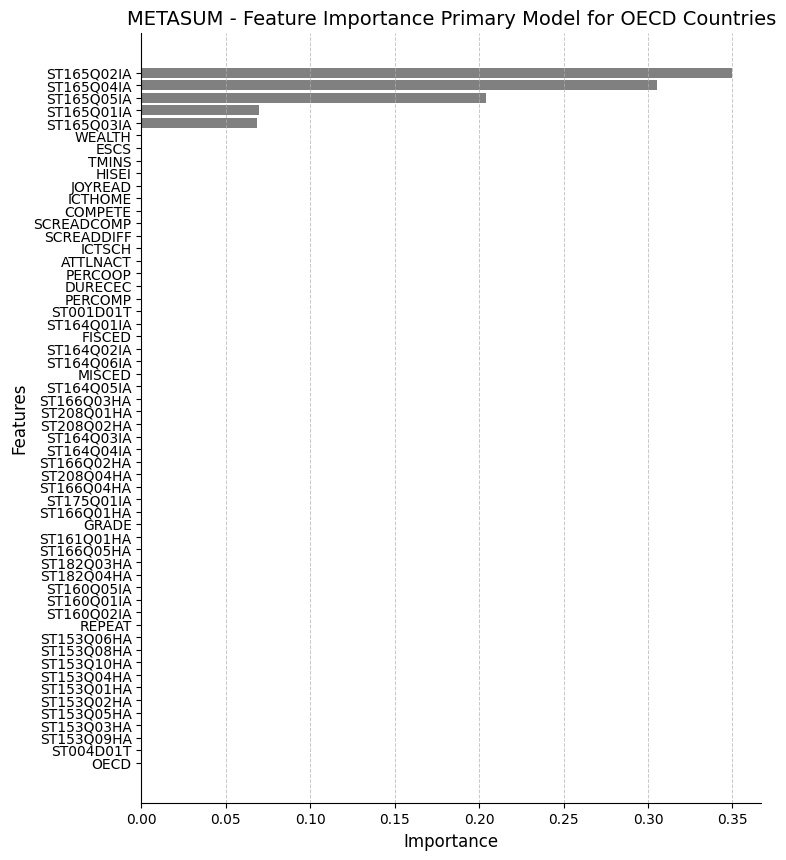

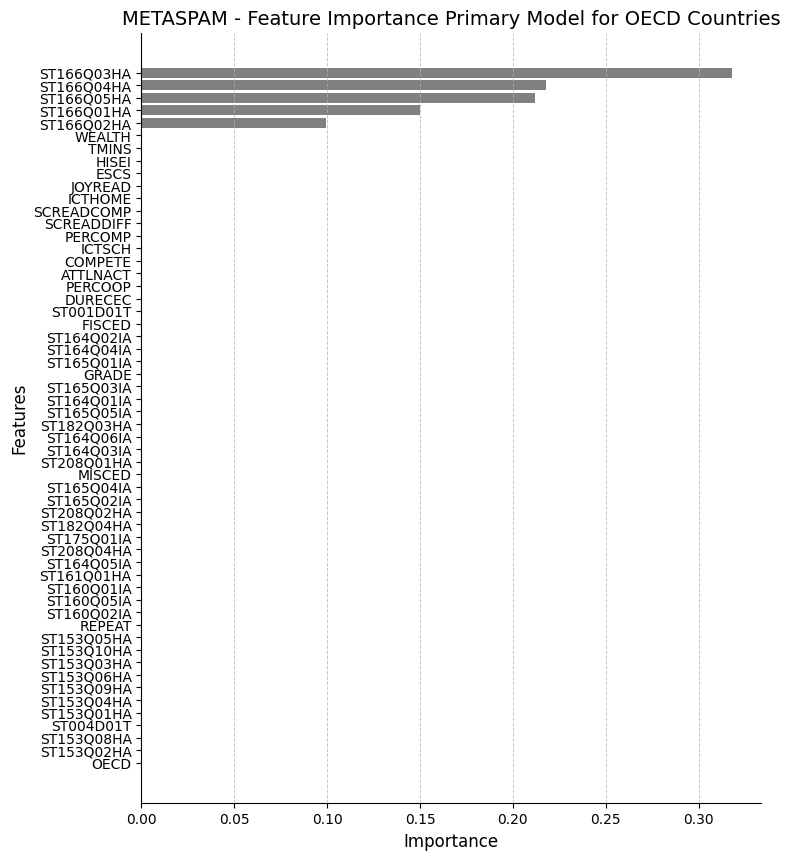

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot feature importances and save as .png
def plot_feature_importance(importances, feature_names, model_name):
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

    plt.figure(figsize=(8, 10))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='grey')

    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title(f'{model_name} - Feature Importance Primary Model for OECD Countries', fontsize=14)

    plt.yticks(fontsize=10)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.grid(axis='x', linestyle='--', alpha=0.7, linewidth=0.7)

    # Save the plot as a .png file with 600 dpi and tight bounding box
    plt.savefig(f'{model_name.lower()}_feature_importance_all_primary.png', dpi=600, bbox_inches='tight')

    plt.show()

# Get feature importances from the models
undrem_feature_importances = model_undrem.feature_importances_
metasum_feature_importances = model_metasum.feature_importances_
metaspam_feature_importances = model_metaspam.feature_importances_

# Assuming X.columns gives you the feature names, call the function for each model
plot_feature_importance(undrem_feature_importances, X.columns, 'UNDREM')
plot_feature_importance(metasum_feature_importances, X.columns, 'METASUM')
plot_feature_importance(metaspam_feature_importances, X.columns, 'METASPAM')

## Getting the Feature Imporance Statistics for All Models for OECD Countries

In [ ]:
# Create a DataFrame to hold the feature importance values for the UNDREM model
feature_importance_undrem_df = pd.DataFrame({'Feature': X.columns, 'Importance': undrem_feature_importances})

# Sort the DataFrame by the 'Importance' column in ascending order
feature_importance_undrem_df = feature_importance_undrem_df.sort_values(by='Importance', ascending=True)

# Print the sorted DataFrame
print(feature_importance_undrem_df)

       Feature  Importance
0         OECD    0.000000
2    ST004D01T    0.000037
10  ST153Q09HA    0.000038
9   ST153Q08HA    0.000038
11  ST153Q10HA    0.000038
3   ST153Q01HA    0.000040
4   ST153Q02HA    0.000040
5   ST153Q03HA    0.000040
7   ST153Q05HA    0.000046
6   ST153Q04HA    0.000047
8   ST153Q06HA    0.000050
13  ST160Q02IA    0.000068
43      REPEAT    0.000071
12  ST160Q01IA    0.000075
16  ST161Q01HA    0.000080
14  ST160Q05IA    0.000090
34  ST182Q04HA    0.000116
33  ST182Q03HA    0.000123
15  ST175Q01IA    0.000124
31  ST166Q04HA    0.000125
29  ST166Q02HA    0.000127
32  ST166Q05HA    0.000130
37  ST208Q04HA    0.000130
35  ST208Q01HA    0.000131
36  ST208Q02HA    0.000132
38       GRADE    0.000132
28  ST166Q01HA    0.000136
39      MISCED    0.000141
40      FISCED    0.000148
25  ST165Q03IA    0.000153
1    ST001D01T    0.000160
27  ST165Q05IA    0.000164
30  ST166Q03HA    0.000164
24  ST165Q02IA    0.000170
23  ST165Q01IA    0.000170
26  ST165Q04IA    0.000172
4

In [ ]:
feature_importance_msum_df = pd.DataFrame({'Feature': X.columns, 'Importance': metasum_feature_importances})
feature_importance_msum_df = feature_importance_msum_df.sort_values(by='Importance', ascending=True)
print(feature_importance_msum_df)

       Feature  Importance
0         OECD    0.000000
2    ST004D01T    0.000012
10  ST153Q09HA    0.000013
5   ST153Q03HA    0.000014
7   ST153Q05HA    0.000014
4   ST153Q02HA    0.000014
3   ST153Q01HA    0.000015
6   ST153Q04HA    0.000015
11  ST153Q10HA    0.000015
9   ST153Q08HA    0.000016
8   ST153Q06HA    0.000016
43      REPEAT    0.000023
13  ST160Q02IA    0.000027
12  ST160Q01IA    0.000028
14  ST160Q05IA    0.000032
34  ST182Q04HA    0.000040
33  ST182Q03HA    0.000042
32  ST166Q05HA    0.000043
16  ST161Q01HA    0.000043
38       GRADE    0.000045
28  ST166Q01HA    0.000046
15  ST175Q01IA    0.000046
31  ST166Q04HA    0.000047
37  ST208Q04HA    0.000050
29  ST166Q02HA    0.000051
20  ST164Q04IA    0.000053
19  ST164Q03IA    0.000053
36  ST208Q02HA    0.000053
35  ST208Q01HA    0.000057
30  ST166Q03HA    0.000058
21  ST164Q05IA    0.000058
39      MISCED    0.000060
22  ST164Q06IA    0.000060
18  ST164Q02IA    0.000060
40      FISCED    0.000063
17  ST164Q01IA    0.000069
1

In [ ]:
feature_importance_mspam_df = pd.DataFrame({'Feature': X.columns, 'Importance': metaspam_feature_importances})
feature_importance_mspam_df = feature_importance_mspam_df.sort_values(by='Importance', ascending=True)
print(feature_importance_mspam_df)

       Feature  Importance
0         OECD    0.000000
4   ST153Q02HA    0.000011
9   ST153Q08HA    0.000011
2    ST004D01T    0.000011
3   ST153Q01HA    0.000012
6   ST153Q04HA    0.000012
10  ST153Q09HA    0.000013
8   ST153Q06HA    0.000015
5   ST153Q03HA    0.000015
11  ST153Q10HA    0.000017
7   ST153Q05HA    0.000017
43      REPEAT    0.000029
13  ST160Q02IA    0.000029
14  ST160Q05IA    0.000030
12  ST160Q01IA    0.000031
16  ST161Q01HA    0.000035
21  ST164Q05IA    0.000041
37  ST208Q04HA    0.000042
15  ST175Q01IA    0.000042
34  ST182Q04HA    0.000045
36  ST208Q02HA    0.000046
24  ST165Q02IA    0.000050
26  ST165Q04IA    0.000051
39      MISCED    0.000052
35  ST208Q01HA    0.000052
19  ST164Q03IA    0.000053
22  ST164Q06IA    0.000053
33  ST182Q03HA    0.000053
27  ST165Q05IA    0.000053
17  ST164Q01IA    0.000054
25  ST165Q03IA    0.000055
38       GRADE    0.000056
23  ST165Q01IA    0.000058
20  ST164Q04IA    0.000058
18  ST164Q02IA    0.000060
40      FISCED    0.000062
1

# Testing the impact of non-cognitive variables

In [ ]:
# Remove Direct Impact Variables
columns_to_remove = ['ST164Q01IA', 'ST164Q02IA', 'ST164Q03IA', 'ST164Q04IA', 'ST164Q05IA', 'ST164Q06IA', 'ST165Q01IA', 'ST165Q02IA', 'ST165Q03IA', 'ST165Q04IA', 'ST165Q05IA', 'ST166Q01HA', 'ST166Q02HA', 'ST166Q03HA', 'ST166Q04HA', 'ST166Q05HA']
X_train_new = X_train.drop(columns=columns_to_remove)

In [ ]:
# Train New Models
# A. Meta-cognition of Reading: Understanding and Remembering
model_undrem_new = RandomForestRegressor(n_estimators=100)
model_undrem_new.fit(X_train_new, y_undrem_train)

RandomForestRegressor()

In [ ]:
# B. Meta-cognition of Reading: Summarizing
model_metasum_new = RandomForestRegressor(n_estimators=100)
model_metasum_new.fit(X_train_new, y_metasum_train)

RandomForestRegressor()

In [ ]:
# C. Meta-cognition of Reading: Assessing Credibility
model_metaspam_new = RandomForestRegressor(n_estimators=100)
model_metaspam_new.fit(X_train_new, y_metaspam_train)

RandomForestRegressor()

In [ ]:
# Validitaning Using Test Set
X_test_new = X_test.drop(columns=columns_to_remove)
y_undrem_pred_test_new = model_undrem_new.predict(X_test_new)
y_metasum_pred_test_new = model_metasum_new.predict(X_test_new)
y_metaspam_pred_test_new = model_undrem_new.predict(X_test_new)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to print performance metrics
def print_metrics(model, X, y, dataset_type):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)

    print(f"{dataset_type} - Noncognitive Model: Mean Squared Error for OECD Countries: {mse}")
    print(f"{dataset_type} - Noncognitive Model: Mean Absolute Error for OECD Countries: {mae}")
    print(f"{dataset_type} - Noncognitive Model: R-squared Score for OECD Countries: {r2}")

# Calculate and print performance metrics for new models
print("New UNDREM Model:")
print_metrics(model_undrem_new, X_test_new, y_undrem_test, "Test")

print("\nNew METASUM Model:")
print_metrics(model_metasum_new, X_test_new, y_metasum_test, "Test")

print("\nNew METASPAM Model:")
print_metrics(model_metaspam_new, X_test_new, y_metaspam_test, "Test")

New UNDREM Model:
Test - Noncognitive Model: Mean Squared Error for OECD Countries: 0.7792860423786293
Test - Noncognitive Model: Mean Absolute Error for OECD Countries: 0.7129559400115535
Test - Noncognitive Model: R-squared Score for OECD Countries: 0.12773372349117573

New METASUM Model:
Test - Noncognitive Model: Mean Squared Error for OECD Countries: 0.719325570721378
Test - Noncognitive Model: Mean Absolute Error for OECD Countries: 0.6771212551478702
Test - Noncognitive Model: R-squared Score for OECD Countries: 0.18349134890654373

New METASPAM Model:
Test - Noncognitive Model: Mean Squared Error for OECD Countries: 0.7530526983342126
Test - Noncognitive Model: Mean Absolute Error for OECD Countries: 0.7135008345449845
Test - Noncognitive Model: R-squared Score for OECD Countries: 0.14100479449228354


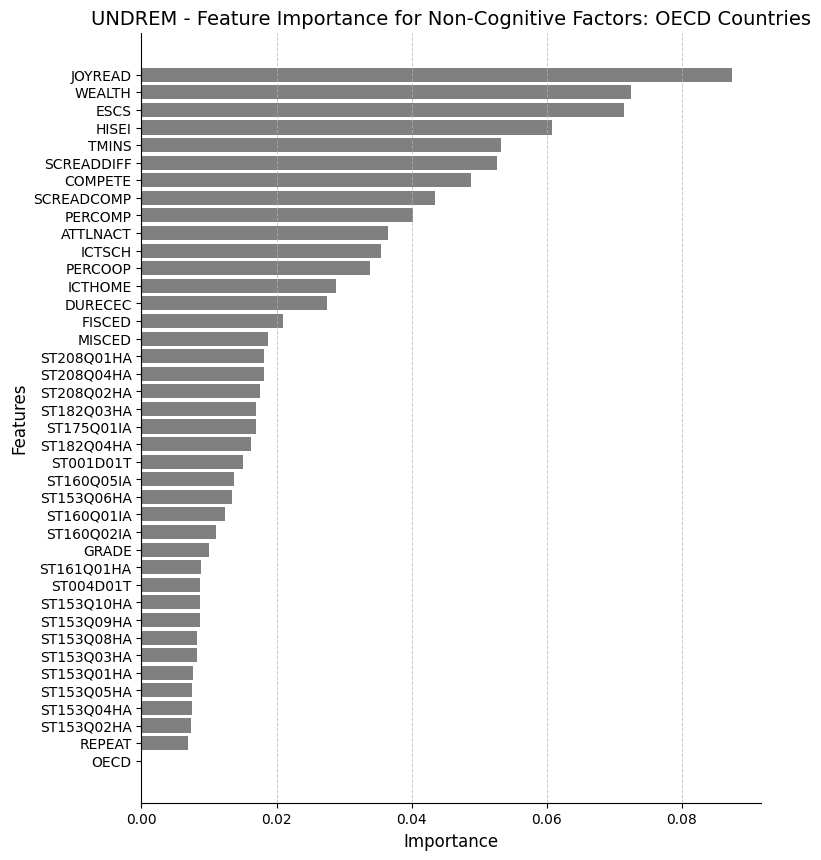

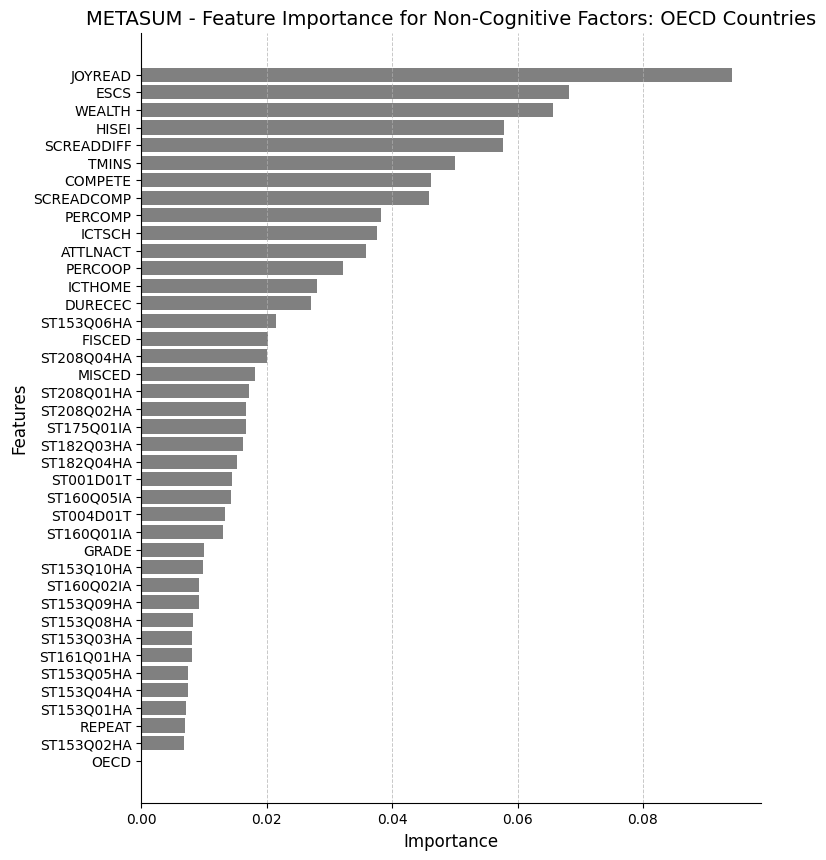

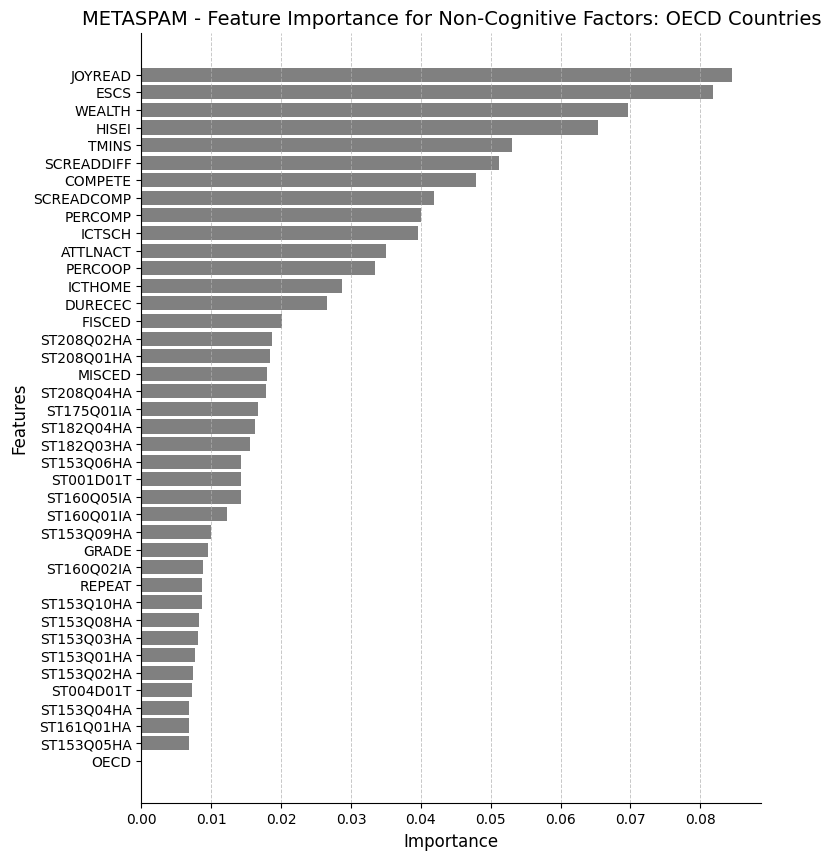

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot feature importances and save as .png
def plot_feature_importance(importances, feature_names, model_name):
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

    plt.figure(figsize=(8, 10))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='grey')

    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title(f'{model_name} - Feature Importance for Non-Cognitive Factors: OECD Countries', fontsize=14)

    plt.yticks(fontsize=10)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.grid(axis='x', linestyle='--', alpha=0.7, linewidth=0.7)

    # Save the plot as a .png file with 600 dpi and tight bounding box
    plt.savefig(f'{model_name.lower()}_feature_importance_non_cognitive_OECD_countries.png', dpi=600, bbox_inches='tight')

    plt.show()

# Get feature importances from the new models
undrem_feature_importances_new = model_undrem_new.feature_importances_
metasum_feature_importances_new = model_metasum_new.feature_importances_
metaspam_feature_importances_new = model_metaspam_new.feature_importances_

# Assuming X_train_new.columns gives you the feature names, call the function for each new model
plot_feature_importance(undrem_feature_importances_new, X_train_new.columns, 'UNDREM')
plot_feature_importance(metasum_feature_importances_new, X_train_new.columns, 'METASUM')
plot_feature_importance(metaspam_feature_importances_new, X_train_new.columns, 'METASPAM')

In [ ]:
# Function to print feature importances
def print_feature_importance(importances, feature_names, model_name):
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(f"Feature Importance for {model_name}")
    print("---------------------------------------")
    print(feature_importance_df)
    print("\n")

# Get feature importances from the new models
undrem_feature_importances_new = model_undrem_new.feature_importances_
metasum_feature_importances_new = model_metasum_new.feature_importances_
metaspam_feature_importances_new = model_metaspam_new.feature_importances_

# Assuming X_train_new.columns gives you the feature names, call the function for each new model
print_feature_importance(undrem_feature_importances_new, X_train_new.columns, 'New UNDREM')
print_feature_importance(metasum_feature_importances_new, X_train_new.columns, 'New METASUM')
print_feature_importance(metaspam_feature_importances_new, X_train_new.columns, 'New METASPAM')

Feature Importance for New UNDREM
---------------------------------------
       Feature  Importance
33     JOYREAD    0.087408
32      WEALTH    0.072499
29        ESCS    0.071495
25       HISEI    0.060723
28       TMINS    0.053209
35  SCREADDIFF    0.052632
39     COMPETE    0.048718
34  SCREADCOMP    0.043511
36     PERCOMP    0.040148
38    ATTLNACT    0.036529
31      ICTSCH    0.035528
37     PERCOOP    0.033864
30     ICTHOME    0.028762
26     DURECEC    0.027474
24      FISCED    0.021015
23      MISCED    0.018750
19  ST208Q01HA    0.018161
21  ST208Q04HA    0.018126
20  ST208Q02HA    0.017568
17  ST182Q03HA    0.017023
15  ST175Q01IA    0.016928
18  ST182Q04HA    0.016235
1    ST001D01T    0.015051
14  ST160Q05IA    0.013706
8   ST153Q06HA    0.013410
12  ST160Q01IA    0.012448
13  ST160Q02IA    0.010977
22       GRADE    0.009947
16  ST161Q01HA    0.008858
2    ST004D01T    0.008719
11  ST153Q10HA    0.008666
10  ST153Q09HA    0.008622
9   ST153Q08HA    0.008285
5   ST15